In [11]:
from bankingSystem import * 
from helperFunctions import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings 
import multiprocessing
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%pylab inline 
pylab.rcParams['figure.figsize'] = (20, 10)
pylab.rcParams['font.size'] = 20

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [27]:
import numpy as np
import pandas as pd
label = ["base", "highCapitalReserve", "lowLevarage", "lowCorrelation", "noCorrelation", "lowBorrow", "noBorrow"]
defaultCollection = np.concatenate([np.load("defaultCollection_lowBorrow.npy"), np.load("defaultCollection_lowBorrow1.npy")],axis=1)
defaultCollection = np.concatenate([defaultCollection,np.load("defaultCollection_noBorrow.npy")],axis=0)
pd.DataFrame(data = defaultCollection.T, columns = label).describe()

,base,highCapitalReserve,lowLevarage,lowCorrelation,noCorrelation,lowBorrow,noBorrow
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6.059500,4.16500,4.605000,6.195500,5.989000,2.811000,0.741000
std,13.098807,9.91332,11.046266,8.189433,2.381326,8.627021,4.020572
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,1.000000,4.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,3.000000,6.000000,0.000000,0.000000
75%,5.000000,3.00000,3.000000,8.000000,7.000000,1.000000,0.000000
max,84.000000,71.00000,88.000000,69.000000,20.000000,78.000000,74.000000


Populating the interactive namespace from numpy and matplotlib


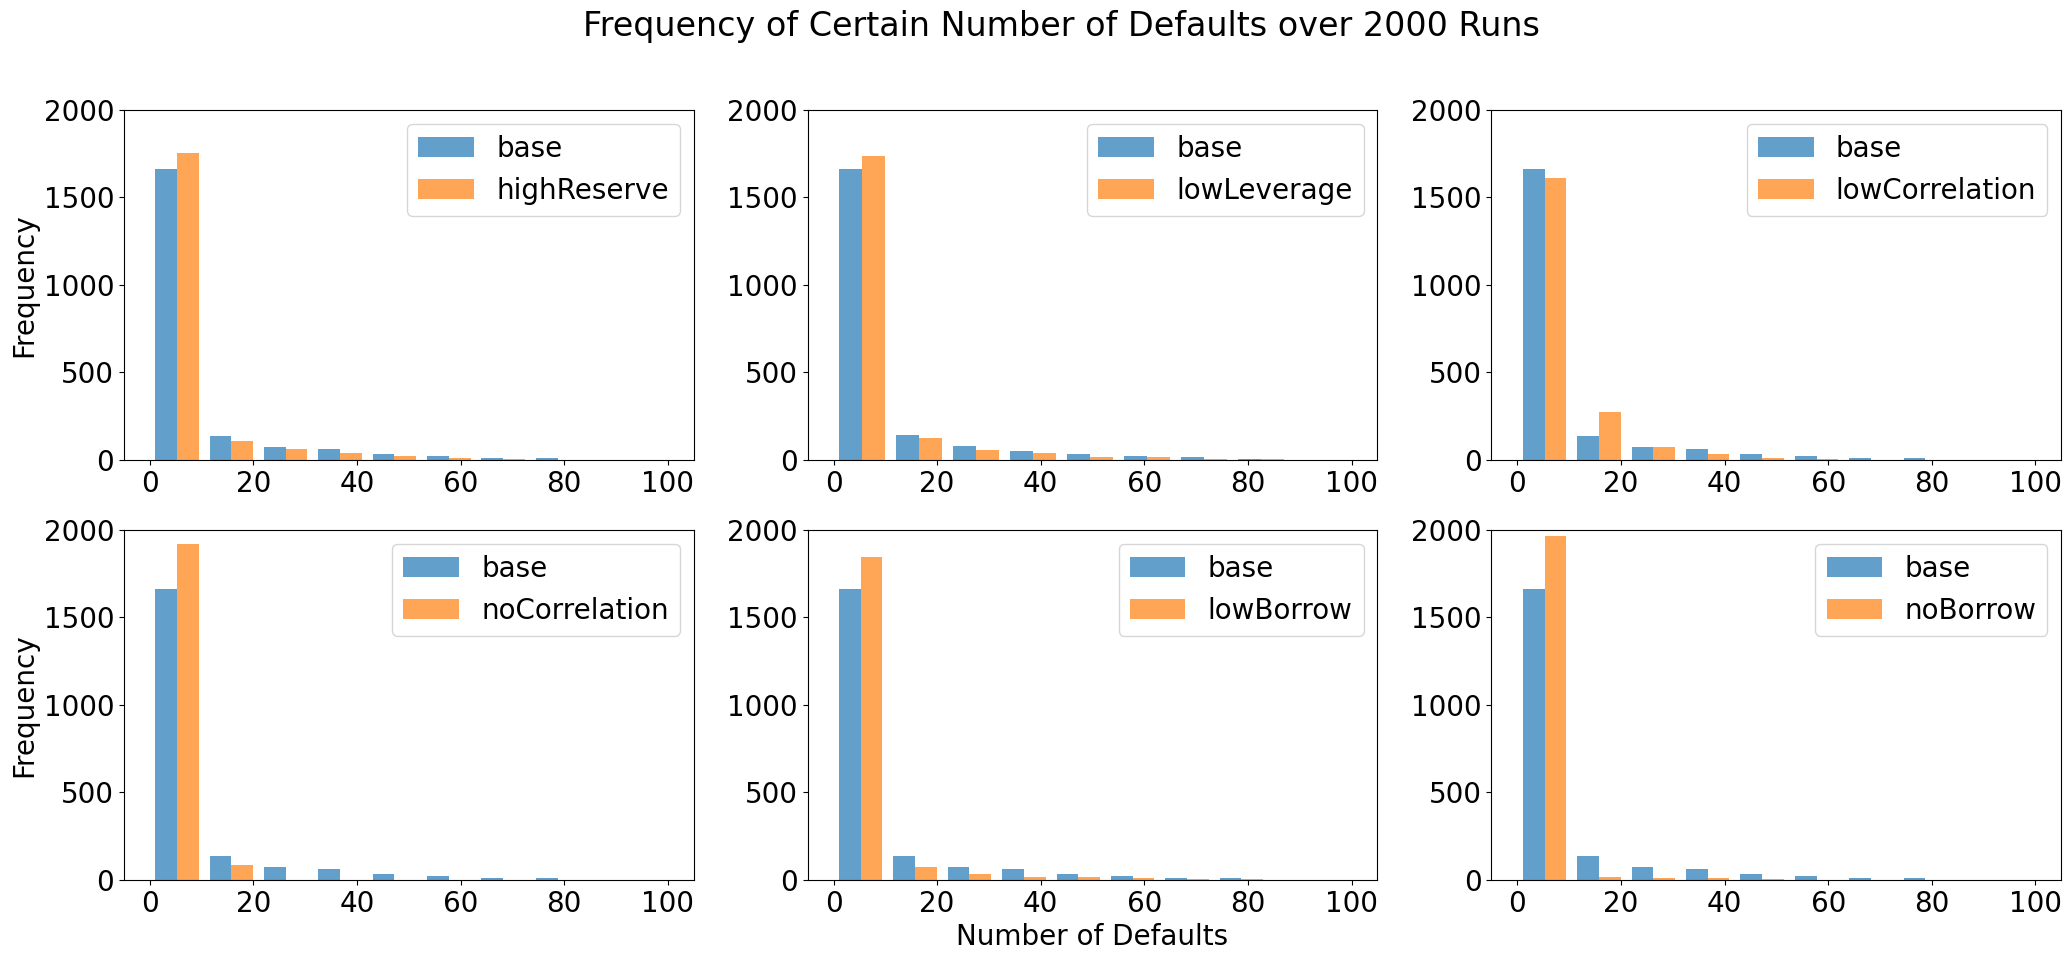

In [28]:
%pylab inline
import matplotlib.pyplot as plt
# create a 2 by 2 plot
pylab.rcParams['font.size'] = 20
fig, axs = plt.subplots(2, 3, figsize=(25,10))
# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (-5, 105)
custom_ylim = (0, 2000)
# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)

fig.suptitle('Frequency of Certain Number of Defaults over 2000 Runs')
axs[0,0].hist([defaultCollection[0], defaultCollection[1]], bins = 8,label = ["base", "highReserve"],alpha=0.7)
axs[0,0].set_ylabel("Frequency")
axs[0,0].legend()
axs[0,1].hist([defaultCollection[0],defaultCollection[2]], bins = 8,label = ["base", "lowLeverage"], alpha=0.7)
axs[0,1].legend()
axs[0,2].hist([defaultCollection[0],defaultCollection[3]], bins = 8,label = ["base", "lowCorrelation"], alpha=0.7)
axs[0,2].legend()
axs[1,0].hist([defaultCollection[0],defaultCollection[4]], bins = 8,label = ["base", "noCorrelation"], alpha=0.7)
axs[1,0].set_ylabel("Frequency")
axs[1,0].legend()
axs[1,1].hist([defaultCollection[0],defaultCollection[5]], bins = 8,label = ["base", "lowBorrow"], alpha=0.7)
axs[1,1].set_xlabel("Number of Defaults")
axs[1,1].legend()
axs[1,2].hist([defaultCollection[0],defaultCollection[6]], bins = 8,label = ["base", "noBorrow"], alpha=0.7)
axs[1,2].legend()

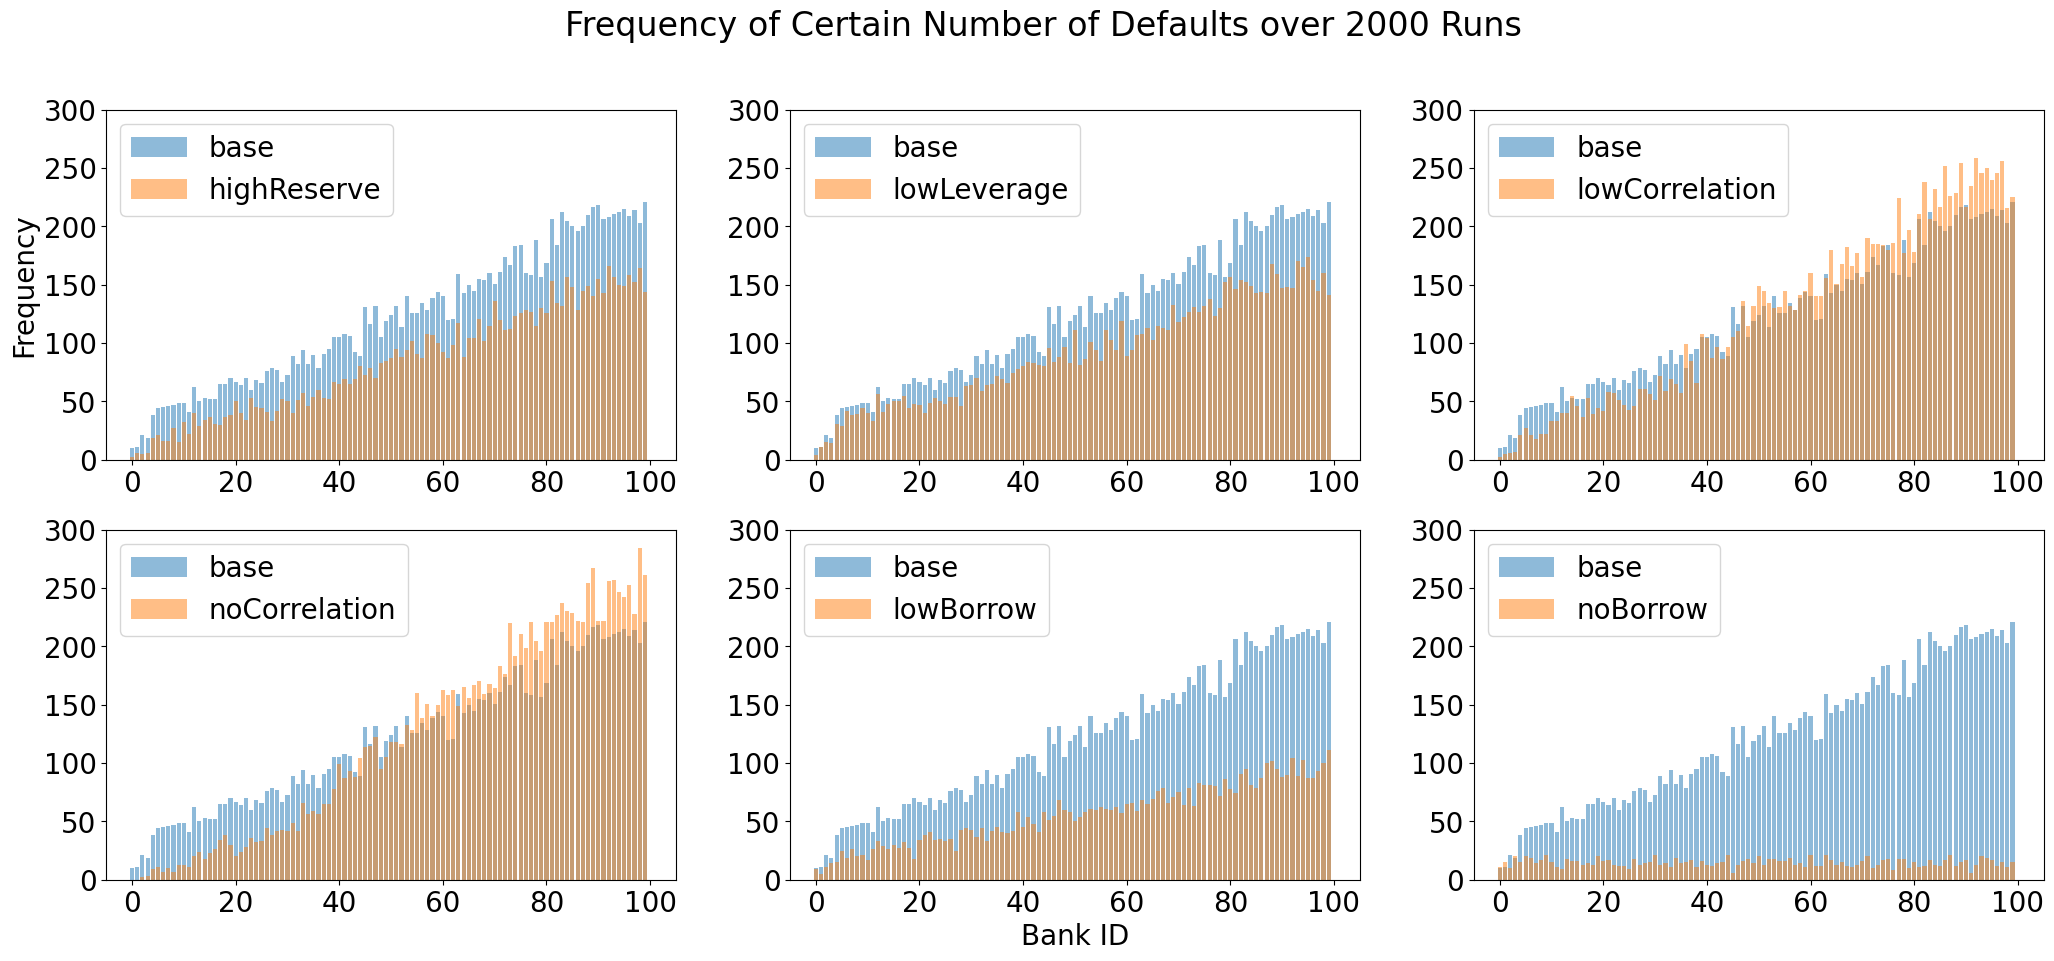

In [30]:
defaultBanks = np.concatenate([np.load("defaultBanks_lowBorrow.npy"), np.load("defaultBanks_lowBorrow1.npy")],axis=1)
defaultBanks = np.concatenate([defaultBanks,np.load("defaultBanks_noBorrow1.npy")],axis=0)
fig, axs = plt.subplots(2, 3, figsize=(25,10))
# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (-5, 105)
custom_ylim = (0, 300)
# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)

fig.suptitle('Frequency of Certain Number of Defaults over 2000 Runs')
axs[0,0].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[0,0].bar(range(100), defaultBanks[1].sum(axis=0), label = "highReserve",alpha=0.5)
axs[0,0].set_ylabel("Frequency")
axs[0,0].legend()
axs[0,1].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[0,1].bar(range(100), defaultBanks[2].sum(axis=0), label = "lowLeverage",alpha=0.5)
axs[0,1].legend()
axs[0,2].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[0,2].bar(range(100), defaultBanks[3].sum(axis=0), label = "lowCorrelation",alpha=0.5)
axs[0,2].legend()
axs[1,0].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[1,0].bar(range(100), defaultBanks[4].sum(axis=0), label = "noCorrelation",alpha=0.5)
axs[0,0].set_ylabel("Frequency")
axs[1,0].legend()
axs[1,1].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[1,1].bar(range(100), defaultBanks[5].sum(axis=0), label = "lowBorrow",alpha=0.5)
axs[1,1].set_xlabel("Bank ID")
axs[1,1].legend()
axs[1,2].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[1,2].bar(range(100), defaultBanks[6].sum(axis=0), label = "noBorrow",alpha=0.5)
axs[1,2].legend()